In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import nibabel as nib
import numpy.ma as ma
from numpy import savetxt
import os
#set up working directories
outDir = '/host/percy/local_raid/hans/amyg/hist/outputs/'

In [17]:
#input variables
res='100'
side='L'

In [18]:
# load mask to clean off all background data from feature data
# pick different masks depending on the cropping size
maskNif = nib.load(outDir+'amyg_'+side+'_'+res+'um_mask-bin-vF_ero5.nii.gz')
mask = np.array(maskNif.dataobj)

#turn mask into a list
maskBin = np.where(mask == 1, 0, 1)
maskBin = maskBin.tolist()

In [19]:
#load target amydala segmentation derived from julich probability maps and then save nifty file as csv
target_file=str('prob_prctile_all_overlap')
tmp = nib.load(outDir+side+'_'+res+'um_'+target_file+'.nii.gz')
#tmp = nib.load(outDir+res+'um_mpm_'+side+'_rescale.nii.gz')
a = np.array(tmp.dataobj)
target = ma.masked_array(a, maskBin)
target = target.compressed()
savetxt(outDir+side+'_'+res+'um_'+target_file+'.csv',target, delimiter=',')

In [20]:
#calculate UMAP embeddings and save a csv file for each embedding
import umap.umap_ as umap
nn=15
md=0.1
os.chdir(outDir)
df=pd.read_csv(res+'umfeatures_'+side+'/cropped_featurebank_ero5_1sd.csv',header=None)

path = str(outDir +'/'+res+'umUMAPembeddings_'+side+'_amyg_ero5_1sd.csv')

reducer = umap.UMAP(n_neighbors=nn, min_dist=md)

feature_data = df.values
scaled_feature_data = StandardScaler().fit_transform(feature_data)

embedding = reducer.fit_transform(scaled_feature_data)
        
savetxt(path,embedding, delimiter=',')


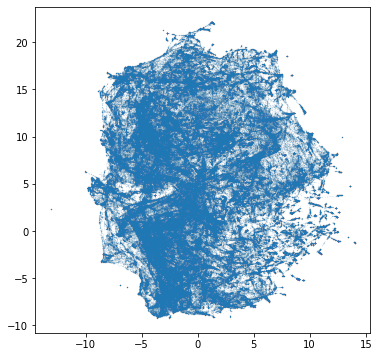

In [21]:
#project UMAP embeddings as scatter plot
embedding=embedding
plt.figure(figsize=(6,6))
plt.scatter(
    embedding[:, 1],
    embedding[:, 0],
    s=.001)

plt.show
plt.savefig(str('/home/bic/hauer/Desktop/amyg_'+side+'_UMAP.png'))
plt.title('UMAP projection of the amygdala', fontsize=20)